Summary:
Healthy Leaves - Mean: [137.85684679 143.78662425 120.87031897]  Standard Deviation: [51.66489044 34.80282996 51.93495327]
Powdery Mildew Leaves - Mean: [115.86571355 122.8861204  103.11079315]  Standard Deviation: [36.25081573 33.6141598  41.73180473]


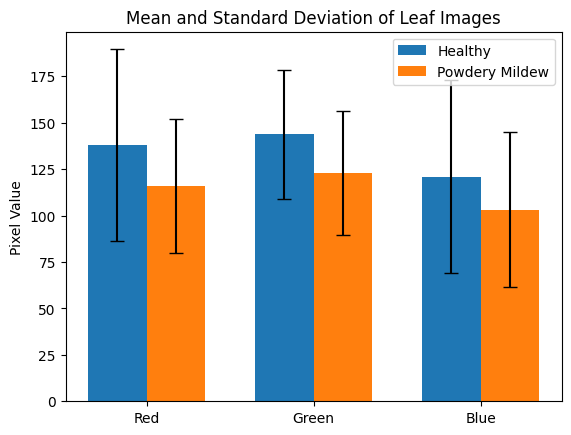

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to calculate mean and standard deviation of a set of images
def calculate_stats(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
    images = np.array(images)
    mean = np.mean(images, axis=(0, 1, 2))
    std = np.std(images, axis=(0, 1, 2))
    return mean, std

# Paths to folders containing images
healthy_folder = './data_split/train/healthy'
mildew_folder = './data_split/train/powdery_mildew'

# Calculate statistics for healthy leaves
healthy_mean, healthy_std = calculate_stats(healthy_folder)

# Calculate statistics for powdery mildew leaves
mildew_mean, mildew_std = calculate_stats(mildew_folder)

# Plotting
labels = ['Red', 'Green', 'Blue']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, healthy_mean, width, label='Healthy', yerr=healthy_std, capsize=5)
rects2 = ax.bar(x + width/2, mildew_mean, width, label='Powdery Mildew', yerr=mildew_std, capsize=5)

ax.set_ylabel('Pixel Value')
ax.set_title('Mean and Standard Deviation of Leaf Images')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Print summary
print("Summary:")
print("Healthy Leaves - Mean:", healthy_mean, " Standard Deviation:", healthy_std)
print("Powdery Mildew Leaves - Mean:", mildew_mean, " Standard Deviation:", mildew_std)

plt.show()

In [3]:
!pip install tensorflow




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 137.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 145.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 137.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 124.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 137.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 73.0 MB/s eta 0:00:00
 

In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Load and preprocess images
def preprocess_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))  # Resize to fit model input size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load pre-trained model
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

# Classify images
def classify_images(images):
    predictions = model.predict(images)
    labels = tf.keras.applications.imagenet_utils.decode_predictions(predictions)
    return labels

# Paths to folders containing images
healthy_folder = './data_split/train/healthy'
mildew_folder = './data_split/train/powdery_mildew'

# Preprocess images
healthy_images = preprocess_images(healthy_folder)
mildew_images = preprocess_images(mildew_folder)

# Classify images
healthy_predictions = classify_images(healthy_images)
mildew_predictions = classify_images(mildew_images)

# Display classification results
print("Healthy Leaves:")
for i, prediction in enumerate(healthy_predictions):
    print(f"Image {i+1}: {prediction[0][1]} ({prediction[0][2]*100:.2f}% confidence)")

print("\nPowdery Mildew Leaves:")
for i, prediction in enumerate(mildew_predictions):
    print(f"Image {i+1}: {prediction[0][1]} ({prediction[0][2]*100:.2f}% confidence)")


2024-04-24 19:52:46.793537: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 422080512 exceeds 10% of free system memory.


22/22 [==============================] - 14s 614ms/step


2024-04-24 19:53:03.145713: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 422080512 exceeds 10% of free system memory.


22/22 [==============================] - 9s 425ms/step
Healthy Leaves:
Image 1: pick (76.72% confidence)
Image 2: pick (70.94% confidence)
Image 3: nematode (11.09% confidence)
Image 4: pick (80.15% confidence)
Image 5: cleaver (25.23% confidence)
Image 6: cleaver (24.47% confidence)
Image 7: pick (15.77% confidence)
Image 8: nipple (13.80% confidence)
Image 9: pick (12.99% confidence)
Image 10: pick (75.27% confidence)
Image 11: pick (87.91% confidence)
Image 12: nematode (8.07% confidence)
Image 13: pick (49.25% confidence)
Image 14: nipple (24.21% confidence)
Image 15: loupe (24.05% confidence)
Image 16: nipple (44.11% confidence)
Image 17: pick (71.44% confidence)
Image 18: hourglass (21.73% confidence)
Image 19: pick (14.73% confidence)
Image 20: lacewing (16.72% confidence)
Image 21: pick (61.36% confidence)
Image 22: pick (42.21% confidence)
Image 23: pick (23.99% confidence)
Image 24: knee_pad (13.45% confidence)
Image 25: pick (97.92% confidence)
Image 26: dugong (13.13% confi

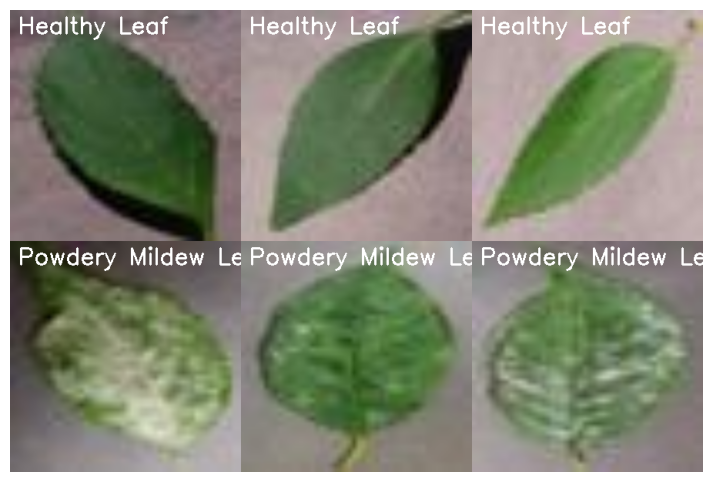

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to create an image montage
def create_montage(images, titles, rows, cols):
    montage = None
    idx = 0
    for i in range(rows):
        row_images = []
        for j in range(cols):
            if idx < len(images):
                img = cv2.resize(images[idx], (300, 300))  # Resize images for montage
                cv2.putText(img, titles[idx], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
                row_images.append(img)
                idx += 1
            else:
                # Add blank image if no more images to display
                row_images.append(np.zeros((300, 300, 3), dtype=np.uint8))
        row_montage = np.hstack(row_images)
        if montage is None:
            montage = row_montage
        else:
            montage = np.vstack([montage, row_montage])
    return montage

# Paths to folders containing images
healthy_folder = './data_split/train/healthy'
mildew_folder = './data_split/train/powdery_mildew'

# Load images
healthy_images = [cv2.imread(os.path.join(healthy_folder, filename)) for filename in os.listdir(healthy_folder)[:3]]
mildew_images = [cv2.imread(os.path.join(mildew_folder, filename)) for filename in os.listdir(mildew_folder)[:3]]

# Title for images
healthy_titles = ['Healthy Leaf'] * len(healthy_images)
mildew_titles = ['Powdery Mildew Leaf'] * len(mildew_images)

# Create montage
montage = create_montage(healthy_images + mildew_images, healthy_titles + mildew_titles, 2, 3)

# Display montage in Jupyter Notebook
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(montage, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


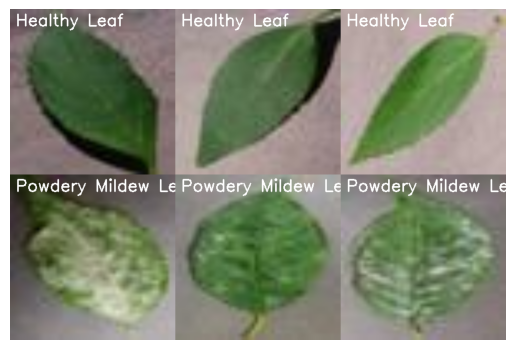

In [7]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Function to create an image montage
def create_montage(images, titles, rows, cols):
    montage = None
    idx = 0
    for i in range(rows):
        row_images = []
        for j in range(cols):
            if idx < len(images):
                img_numpy = images[idx].numpy()  # Convert TensorFlow Eager Tensor to numpy array
                img = cv2.resize(img_numpy, (300, 300))  # Resize images for montage
                cv2.putText(img, titles[idx], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)  # Add text
                row_images.append(img)
                idx += 1
            else:
                # Add blank image if no more images to display
                row_images.append(np.zeros((300, 300, 3), dtype=np.uint8))
        row_montage = np.hstack(row_images)
        if montage is None:
            montage = row_montage
        else:
            montage = np.vstack([montage, row_montage])
    return montage


# Paths to folders containing images
healthy_folder = './data_split/train/healthy'
mildew_folder = './data_split/train/powdery_mildew'

# Load and preprocess images using TensorFlow
healthy_images = [tf.io.read_file(os.path.join(healthy_folder, filename)) for filename in os.listdir(healthy_folder)[:3]]
healthy_images = [tf.image.decode_image(img, channels=3) for img in healthy_images]
mildew_images = [tf.io.read_file(os.path.join(mildew_folder, filename)) for filename in os.listdir(mildew_folder)[:3]]
mildew_images = [tf.image.decode_image(img, channels=3) for img in mildew_images]

# Title for images
healthy_titles = ['Healthy Leaf'] * len(healthy_images)
mildew_titles = ['Powdery Mildew Leaf'] * len(mildew_images)

# Create montage
montage = create_montage(healthy_images + mildew_images, healthy_titles + mildew_titles, 2, 3)

# Display montage using Matplotlib
plt.imshow(montage)
plt.axis('off')
plt.show()


In [10]:
#data augmentation
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 10

# Paths to folders containing images
healthy_folder = './data_split/train/healthy'
mildew_folder = './data_split/train/powdery_mildew'

# Function to load and preprocess images
def load_and_preprocess(folder):
    images = [tf.io.read_file(os.path.join(folder, filename)) for filename in os.listdir(folder)]
    images = [tf.image.decode_image(img, channels=3) for img in images]
    images = [tf.image.resize(img, IMAGE_SIZE) for img in images]
    return images

# Load images
healthy_images = load_and_preprocess(healthy_folder)
mildew_images = load_and_preprocess(mildew_folder)

# Create labels
healthy_labels = np.zeros(len(healthy_images))
mildew_labels = np.ones(len(mildew_images))

# Concatenate images and labels
all_images = np.array(healthy_images + mildew_images)
all_labels = np.concatenate([healthy_labels, mildew_labels])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

# Model building
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training with augmented data
history = model.fit(train_generator, epochs=EPOCHS, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Accuracy:", accuracy)

# Save the model
model.save("leaf_classifier_model_with_augmentation.h5")


NameError: name 'scipy' is not defined

In [2]:
!pip install numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 111.2 MB/s eta 0:00:0000:0100:01


In [2]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 139.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 145.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 140.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 114.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 136.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 145.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 93.8 MB/s eta 0:00:00
 

In [4]:
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 38.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 60.1 MB/s eta 0:00:00:00:0100:01


In [7]:
!pip install scipy
